# CORD-19 overview

In this notebook, we provide an overview of publication medatata for CORD-19.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [2]:
# load metadata

df_meta = pd.read_csv("datasets_output/df_pub.csv",compression="gzip")
df_datasource = pd.read_csv("datasets_output/sql_tables/datasource.csv",sep="\t",header=None,names=['datasource_metadata_id', 'datasource', 'url'])
df_pub_datasource = pd.read_csv("datasets_output/sql_tables/pub_datasource.csv",sep="\t",header=None,names=['pub_id','datasource_metadata_id'])
df_cord_meta = pd.read_csv("datasets_output/sql_tables/cord19_metadata.csv",sep="\t",header=None,names=[ 'cord19_metadata_id', 'source', 'license', 'ms_academic_id',
       'who_covidence', 'sha', 'full_text', 'pub_id'])

In [3]:
df_meta.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,pmid,pmcid,dimensions_id,arxiv_id,timestamp
0,0,Coronavirus disease 2019 (COVID-19) and simult...,Coronavirus disease 2019 (COVID-19) is a recen...,2020.0,5.0,CardioVascular Journal of Africa,31,NaN,1-4,10-5830-cvja-2020-016,32490506.0,NaN,pub.1128171889,NaN,2020-07-02 10:54:27.347501
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,32036640.0,NaN,pub.1124777091,NaN,2020-07-02 10:54:27.347501
2,2,Cohesion in Distancing.,"In isolation, we are physically apart; in soli...",2020.0,4.0,The AMA Journal of Ethic,22,4,e344-345,10.1001/amajethics.2020.344,32345430.0,NaN,pub.1127182341,NaN,2020-07-02 10:54:27.347501
3,3,Salvation in a Time of Plague.,Health workers offer their skills and care to ...,2020.0,5.0,The AMA Journal of Ethic,22,5,e441-445,10.1001/amajethics.2020.441,32449663.0,NaN,pub.1127905371,NaN,2020-07-02 10:54:27.347501
4,4,What Should Health Science Journalists Do in E...,Journalists have long covered outbreaks of inf...,2020.0,1.0,AMA journal of ethics,NaN,NaN,NaN,10.1001/amajethics.2020.55,31958392.0,NaN,NaN,NaN,2020-07-02 10:54:27.347501


In [4]:
df_meta.columns

Index(['pub_id', 'title', 'abstract', 'publication_year', 'publication_month',
       'journal', 'volume', 'issue', 'pages', 'doi', 'pmid', 'pmcid',
       'dimensions_id', 'arxiv_id', 'timestamp'],
      dtype='object')

In [5]:
df_datasource

,datasource_metadata_id,datasource,url
0,0,CORD19,https://pages.semanticscholar.org/coronavirus-...
1,1,Dimensions,https://docs.google.com/spreadsheets/d/1-kTZJZ...


In [6]:
df_pub_datasource.head()

,pub_id,datasource_metadata_id
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
df_cord_meta.head()

,cord19_metadata_id,source,license,ms_academic_id,who_covidence,sha,full_text,pub_id
0,0,Medline; WHO,unk,NaN,#615,NaN,NaN,1
1,1,Medline,unk,NaN,NaN,NaN,NaN,2
2,2,Medline,unk,NaN,NaN,NaN,NaN,3
3,3,Medline,unk,NaN,NaN,NaN,NaN,4
4,4,Medline,unk,NaN,NaN,NaN,NaN,5


#### Select just CORD-19

In [8]:
df_meta = df_meta.merge(df_pub_datasource, how="inner", left_on="pub_id", right_on="pub_id")
df_meta = df_meta.merge(df_datasource, how="inner", left_on="datasource_metadata_id", right_on="datasource_metadata_id")
df_cord19 = df_meta[df_meta.datasource_metadata_id==0]
df_cord19 = df_cord19.merge(df_cord_meta, how="inner", left_on="pub_id", right_on="pub_id")

In [9]:
df_meta.shape

(201599, 18)

In [10]:
df_cord19.shape

(140351, 25)

In [11]:
df_cord19.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,...,datasource_metadata_id,datasource,url,cord19_metadata_id,source,license,ms_academic_id,who_covidence,sha,full_text
0,0,Coronavirus disease 2019 (COVID-19) and simult...,Coronavirus disease 2019 (COVID-19) is a recen...,2020.0,5.0,CardioVascular Journal of Africa,31,NaN,1-4,10-5830-cvja-2020-016,...,0,CORD19,https://pages.semanticscholar.org/coronavirus-...,136796,Medline,unk,NaN,NaN,NaN,NaN
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,...,0,CORD19,https://pages.semanticscholar.org/coronavirus-...,0,Medline; WHO,unk,NaN,#615,NaN,NaN
2,2,Cohesion in Distancing.,"In isolation, we are physically apart; in soli...",2020.0,4.0,The AMA Journal of Ethic,22,4,e344-345,10.1001/amajethics.2020.344,...,0,CORD19,https://pages.semanticscholar.org/coronavirus-...,1,Medline,unk,NaN,NaN,NaN,NaN
3,3,Salvation in a Time of Plague.,Health workers offer their skills and care to ...,2020.0,5.0,The AMA Journal of Ethic,22,5,e441-445,10.1001/amajethics.2020.441,...,0,CORD19,https://pages.semanticscholar.org/coronavirus-...,2,Medline,unk,NaN,NaN,NaN,NaN
4,4,What Should Health Science Journalists Do in E...,Journalists have long covered outbreaks of inf...,2020.0,1.0,AMA journal of ethics,NaN,NaN,NaN,10.1001/amajethics.2020.55,...,0,CORD19,https://pages.semanticscholar.org/coronavirus-...,3,Medline,unk,NaN,NaN,NaN,NaN


#### Publication years

In [12]:
import re

def clean_year(s):
    if pd.isna(s):
        return np.nan
    if not (s>1900):
        return np.nan
    elif s>2020:
        return 2020
    return s

df_cord19["publication_year"] = df_cord19["publication_year"].apply(clean_year)

In [13]:
df_cord19.publication_year.describe()

count    140339.000000
mean       2014.483565
std           7.287965
min        1901.000000
25%        2011.000000
50%        2017.000000
75%        2020.000000
max        2020.000000
Name: publication_year, dtype: float64

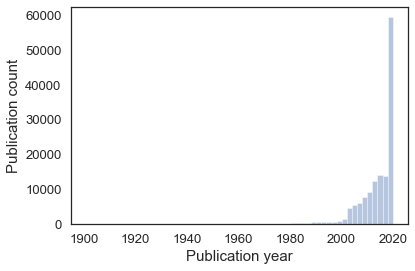

In [16]:
sns.distplot(df_cord19.publication_year.tolist(), bins=60, kde=False)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Publication count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/publication_year_all.pdf")

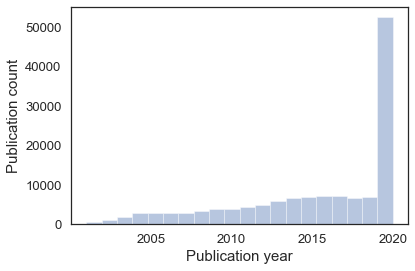

In [18]:
sns.distplot(df_cord19[(pd.notnull(df_cord19.publication_year)) & (df_cord19.publication_year > 2000)].publication_year.tolist(), bins=20, hist=True, kde=False)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Publication count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/publication_year_2000.pdf")

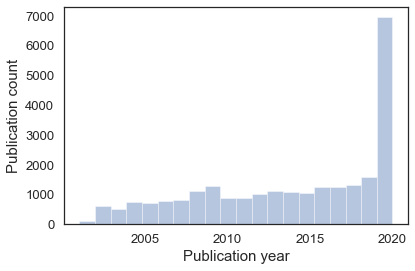

In [20]:
which = "PMC"

sns.distplot(df_cord19[(pd.notnull(df_cord19.publication_year)) & (df_cord19.publication_year > 2000) & (df_cord19.source == which)].publication_year.tolist(), bins=20, hist=True, kde=False)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Publication count", fontsize=15)
plt.tight_layout()

In [19]:
# recent uptake
df_cord19[df_cord19.publication_year>2018].groupby([(df_cord19.publication_year),(df_cord19.publication_month)]).count().pub_id

publication_year  publication_month
2019.0            1.0                    306
                  2.0                    334
                  3.0                    355
                  4.0                    358
                  5.0                    347
                  6.0                    351
                  7.0                    359
                  8.0                    339
                  9.0                    308
                  10.0                   369
                  11.0                   495
                  12.0                   591
2020.0            1.0                   2346
                  2.0                   1397
                  3.0                   3573
                  4.0                   8549
                  5.0                  15606
                  6.0                  15795
                  7.0                   2180
                  8.0                    579
                  9.0                    415
                  1

#### Null values

In [20]:
df_cord19.shape

(140351, 25)

In [21]:
df_cord19["abstract_length"] = df_cord19.abstract.str.len()

In [22]:
df_cord19[df_cord19.abstract_length>0].shape

(109296, 26)

In [23]:
sum(pd.notnull(df_cord19.abstract))

109296

In [24]:
sum(pd.notnull(df_cord19.doi))

127118

In [25]:
sum(pd.notnull(df_cord19.pmcid))

78941

In [26]:
sum(pd.notnull(df_cord19.pmid))

110769

In [27]:
sum(pd.notnull(df_cord19.journal))

137864

#### Journals

In [28]:
df_cord19.journal.value_counts()[:30]

medRxiv                                                                            4319
PLoS One                                                                           1669
bioRxiv                                                                            1668
Journal of virology                                                                1607
arXiv                                                                              1272
Virology                                                                            934
Surgical endoscopy                                                                  918
Emerg Infect Dis                                                                    772
Viruses                                                                             686
Nature                                                                              681
The BMJ                                                                             663
Sci Rep                         

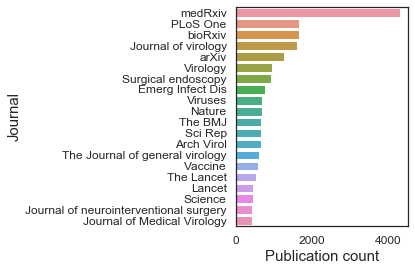

In [31]:
df_sub = df_cord19[df_cord19.journal.isin(df_cord19.journal.value_counts()[:20].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Publication count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/journals.pdf")

#### Sources and licenses

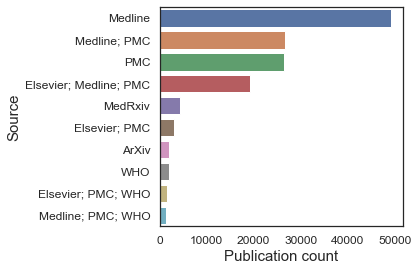

In [32]:
# source
df_sub = df_cord19[df_cord19.source.isin(df_cord19.source.value_counts()[:10].index.tolist())]
b = sns.countplot(y="source", data=df_sub, order=df_sub['source'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Publication count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/sources.pdf")

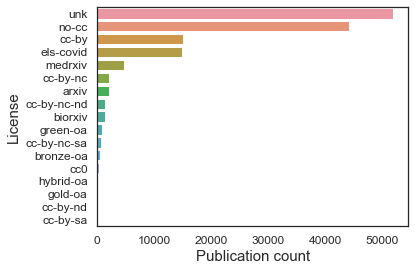

In [33]:
# license
df_sub = df_cord19[df_cord19.license.isin(df_cord19.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Publication count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/licenses.pdf")

#### Full text availability

In [34]:
df_cord19["has_full_text"] = pd.notnull(df_cord19.full_text)

In [60]:
df_cord19["has_full_text"].sum()

69841

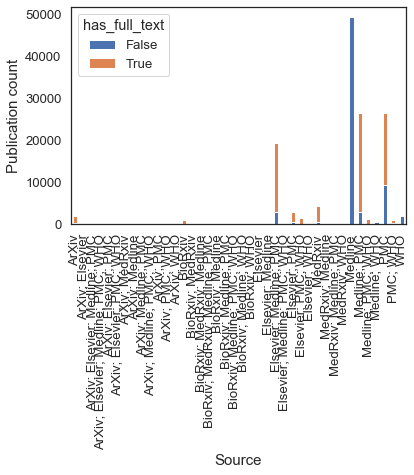

In [35]:
# full text x source
df_plot = df_cord19.groupby(['has_full_text', 'source']).size().reset_index().pivot(columns='has_full_text', index='source', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xlabel("Source", fontsize=15)
plt.ylabel("Publication count", fontsize=15)
#plt.tight_layout()
plt.savefig("figures/source_ft.pdf")

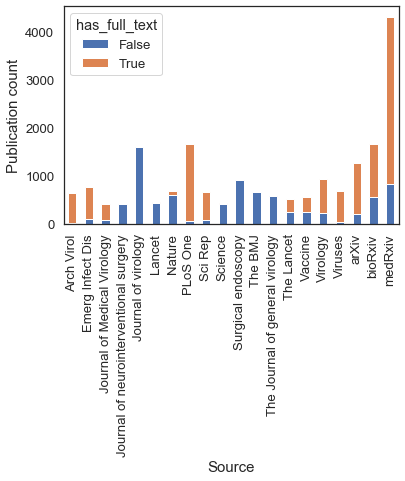

In [36]:
# full text x journal
df_sub = df_cord19[df_cord19.journal.isin(df_cord19.journal.value_counts()[:20].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xlabel("Source", fontsize=15)
plt.ylabel("Publication count", fontsize=15)
#plt.tight_layout()
plt.savefig("figures/journal_ft.pdf")

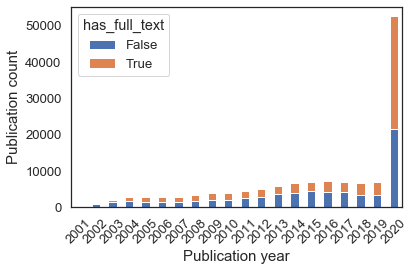

In [37]:
# full text x year
df_sub = df_cord19[(pd.notnull(df_cord19.publication_year)) & (df_cord19.publication_year > 2000)]
df_plot = df_sub.groupby(['has_full_text', 'publication_year']).size().reset_index().pivot(columns='has_full_text', index='publication_year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xticks(np.arange(20), [int(x) for x in df_plot.index.values], rotation=45)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Publication count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/year_ft.pdf")

## Dimensions

In [22]:
# load Dimensions data (you will need to download it on your own!)

directory_name = "datasets_output/json_dimensions_cwts"

all_dimensions = list()
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [23]:
df_dimensions = pd.DataFrame.from_dict({
    "id":[r["id"] for r in all_dimensions],
    "publication_type":[r["publication_type"] for r in all_dimensions],
    "doi":[r["doi"] for r in all_dimensions],
    "pmid":[r["pmid"] for r in all_dimensions],
    "issn":[r["journal"]["issn"] for r in all_dimensions],
    "times_cited":[r["times_cited"] for r in all_dimensions],
    "relative_citation_ratio":[r["relative_citation_ratio"] for r in all_dimensions],
    "for_top":[r["for"][0]["first_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "for_bottom":[r["for"][0]["second_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "open_access_versions":[r["open_access_versions"] for r in all_dimensions]
})

In [24]:
df_dimensions.head()

,id,publication_type,doi,pmid,issn,times_cited,relative_citation_ratio,for_top,for_bottom,open_access_versions
0,pub.1127982992,article,10.1053/j.gastro.2020.05.066,32479824,0016-5085,0,NaN,,,[]
1,pub.1127467922,article,10.1053/j.jvca.2020.04.061,32507459,1053-0770,0,NaN,,,[]
2,pub.1127651503,article,10.1053/j.gastro.2020.05.037,32425228,0016-5085,0,NaN,,,[]
3,pub.1127316115,article,10.1053/j.gastro.2020.04.061,32371115,0016-5085,0,NaN,,,[]
4,pub.1127684826,article,10.1053/j.gastro.2020.05.032,32425234,0016-5085,7,NaN,Medical and Health Sciences,Clinical Sciences,[]


In [25]:
df_dimensions.pmid = df_dimensions.pmid.astype(float)

In [26]:
df_dimensions.shape

(150749, 10)

In [27]:
df_joined_doi = df_cord19[pd.notnull(df_cord19.doi)].merge(df_dimensions[pd.notnull(df_dimensions.doi)], how="inner", left_on="doi", right_on="doi")

In [28]:
df_joined_doi.shape

(120683, 34)

In [29]:
df_joined_pmid = df_cord19[pd.isnull(df_cord19.doi) & pd.notnull(df_cord19.pmid)].merge(df_dimensions[pd.isnull(df_dimensions.doi) & pd.notnull(df_dimensions.pmid)], how="inner", left_on="pmid", right_on="pmid")

In [30]:
df_joined_pmid.shape

(3475, 34)

In [31]:
df_joined = pd.concat([df_joined_doi,df_joined_pmid])

In [32]:
# nearly all publications from CORD-19 are in Dimensions

In [33]:
df_joined.shape

(124158, 37)

In [34]:
df_cord19.shape

(140351, 25)

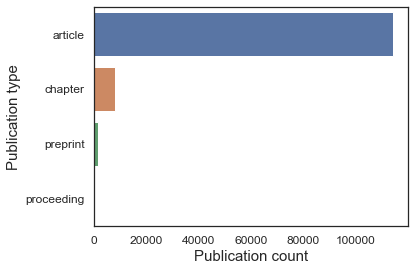

In [35]:
# publication type

df_sub = df_joined[df_joined.publication_type.isin(df_joined.publication_type.value_counts()[:10].index.tolist())]
b = sns.countplot(y="publication_type", data=df_sub, order=df_sub['publication_type'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Publication count",fontsize=15)
b.set_ylabel("Publication type",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_pub_type.pdf")

#### Citation counts

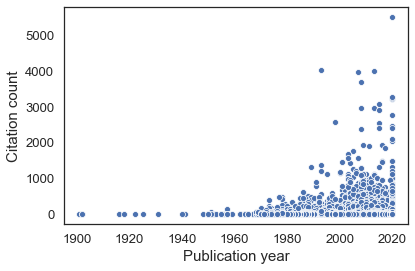

In [36]:
# scatter of citations vs time of publication

sns.scatterplot(df_joined.publication_year.to_list(),df_joined.times_cited.to_list())
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Citation count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/dim_citations_year.png")

In [54]:
# most cited papers

df_joined[["title","times_cited","relative_citation_ratio","journal","publication_year","doi"]].sort_values("times_cited",ascending=False).head(20)

,title,times_cited,relative_citation_ratio,journal,publication_year,doi
54203,Clinical features of patients infected with 20...,5508,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30183-5
70764,Biological roles of oligosaccharides: all of t...,4021,92.34,Glycobiology,1993.0,10.1093/glycob/3.2.97
73489,Surviving sepsis campaign: international guide...,3998,205.11,Critical care medicine,2013.0,10.1097/ccm.0b013e31827e83af
68464,Infectious Diseases Society of America/America...,3967,111.15,Clin Infect Dis,2007.0,10.1086/511159
53906,Epidemiology and causes of preterm birth,3680,120.06,The Lancet,2008.0,10.1016/s0140-6736(08)60074-4
65630,Clinical Characteristics of Coronavirus Diseas...,3278,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2002032
65626,A Novel Coronavirus from Patients with Pneumon...,3250,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001017
264,Clinical Characteristics of 138 Hospitalized P...,3220,NaN,JAMA,2020.0,10.1001/jama.2020.1585
65611,Randomized assessment of rapid endovascular tr...,3079,197.01,The New England journal of medicine,2015.0,10.1056/nejmoa1414905
11939,Surviving Sepsis Campaign: International Guide...,2962,147.71,Intensive Care Med,2013.0,10.1007/s00134-012-2769-8


In [55]:
# same but in 2020; note that duplicates are due to SI or pre-prints with different PMIDs

df_joined[df_joined.publication_year>2019][["title","times_cited","relative_citation_ratio","journal","publication_year","doi"]].sort_values("times_cited",ascending=False).head(10)

,title,times_cited,relative_citation_ratio,journal,publication_year,doi
54203,Clinical features of patients infected with 20...,5508,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30183-5
65630,Clinical Characteristics of Coronavirus Diseas...,3278,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2002032
65626,A Novel Coronavirus from Patients with Pneumon...,3250,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001017
264,Clinical Characteristics of 138 Hospitalized P...,3220,NaN,JAMA,2020.0,10.1001/jama.2020.1585
54207,Epidemiological and clinical characteristics o...,2762,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30211-7
54274,Clinical course and risk factors for mortality...,2464,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30566-3
65629,"Early Transmission Dynamics in Wuhan, China, o...",2399,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001316
62837,A pneumonia outbreak associated with a new cor...,2115,NaN,Nature,2020.0,10.1038/s41586-020-2012-7
276,Characteristics of and Important Lessons From ...,2042,NaN,JAMA,2020.0,10.1001/jama.2020.2648
54202,A familial cluster of pneumonia associated wit...,1485,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30154-9


In [56]:
# most cited journals

df_joined[['journal','times_cited']].groupby('journal').sum().sort_values('times_cited',ascending=False).head(20)

,times_cited
journal,
The Lancet,52488
PLoS One,40269
Nature,39561
Virology,36643
Emerg Infect Dis,35327
Journal of virology,33933
JAMA,28422
Surgical endoscopy,23332
Lancet,22943


#### Categories

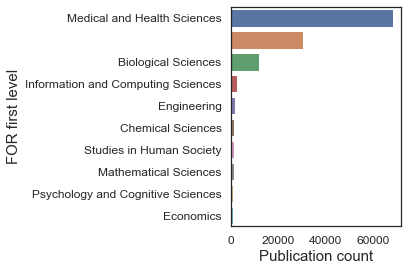

In [58]:
# FOR jeywords distribution, TOP

df_sub = df_joined[df_joined.for_top.isin(df_joined.for_top.value_counts()[:10].index.tolist())]
b = sns.countplot(y="for_top", data=df_sub, order=df_sub['for_top'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Publication count",fontsize=15)
b.set_ylabel("FOR first level",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_for_top.pdf")

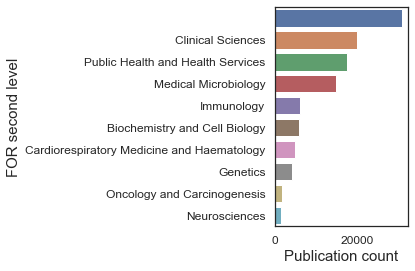

In [59]:
# FOR jeywords distribution, TOP

df_sub = df_joined[df_joined.for_bottom.isin(df_joined.for_bottom.value_counts()[:10].index.tolist())]
b = sns.countplot(y="for_bottom", data=df_sub, order=df_sub['for_bottom'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Publication count",fontsize=15)
b.set_ylabel("FOR second level",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_for_bottom.pdf")